In [1]:
import pandas as pd

dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


In [2]:
dados['y_reta'] = dados['X']

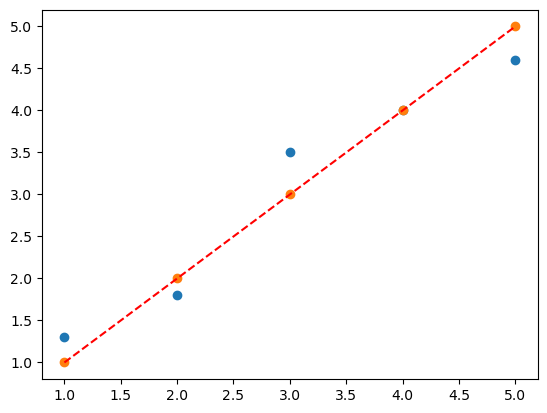

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dados['X'], dados['Y'])
ax.plot(dados['X'], dados['y_reta'], '--r')
ax.scatter(dados['X'], dados['y_reta'])

plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X = dados['X'].values.reshape(-1,1)

In [6]:
reg = LinearRegression()
reg.fit(X, dados.Y)

LinearRegression()

In [7]:
a, b = reg.coef_[0], reg.intercept_

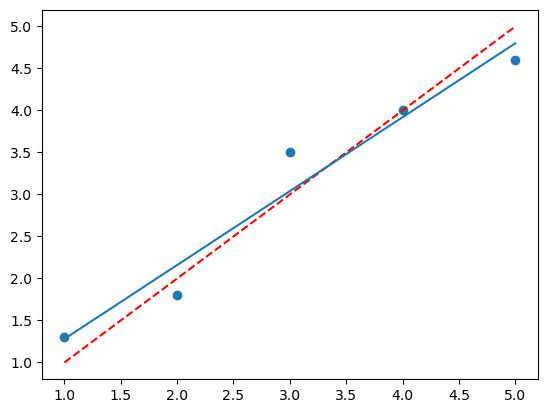

In [8]:
fig, ax = plt.subplots()

x = dados.X
y = a * x + b

ax.scatter(dados['X'], dados['Y'])
ax.plot(dados['X'], dados['y_reta'], '--r')
ax.plot(dados['X'], y)

plt.show()

In [9]:
dados['y_pred'] = reg.predict(X)

dados['erro reta'] = (dados.Y - dados.y_reta) ** 2

dados['erro y_pred'] = (dados.Y - dados.y_pred) ** 2

In [10]:
dados[['erro reta', 'erro y_pred']].sum()

erro reta      0.540
erro y_pred    0.388
dtype: float64

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
mae_reta, mse_reta = mean_absolute_error(dados.Y, dados.y_reta), mean_squared_error(dados.Y, dados.y_reta)
mae_pred, mse_pred = mean_absolute_error(dados.Y, dados.y_pred), mean_squared_error(dados.Y, dados.y_pred)

In [13]:
print(f'Reta - MAE: {mae_reta}, MSE: {mse_reta}\nPred - MAE: {mae_pred}, MSE: {mse_pred}')

Reta - MAE: 0.2800000000000001, MSE: 0.10800000000000005
Pred - MAE: 0.22400000000000003, MSE: 0.07760000000000003


In [14]:
from sklearn.datasets import fetch_california_housing

In [15]:
f_housing = fetch_california_housing()

In [16]:
housing = pd.DataFrame(f_housing.data, columns=f_housing.feature_names)
housing['MedHouseVal'] = f_housing.target

In [17]:
housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [18]:
X, y = housing.MedInc, housing.MedHouseVal

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [21]:
y_pred = reg.predict(X_test.values.reshape(-1, 1))

In [22]:
mae_y_pred, mse_y_pred = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [23]:
print(f'MAE: {mae_y_pred}, MSE: {mse_y_pred}')

MAE: 0.6265986453094174, MSE: 0.7028461448540976


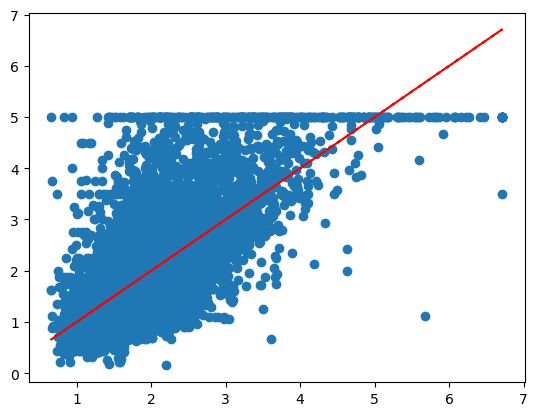

In [24]:
fig, ax = plt.subplots()

a, b = reg.coef_[0], reg.intercept_
y_plot = a * X_test + b

ax.scatter(y_pred, y_test)
ax.plot(y_pred, y_plot, '--r')

plt.show()

#### Regressão linear múltipla

In [25]:
X, y = housing.drop('MedHouseVal', axis=1), housing.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
reg.coef_, reg.intercept_

(array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
        -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01]),
 -37.08201093908018)

In [28]:
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}')

MAE: 0.5295710106684468, MSE: 0.5369686543372455


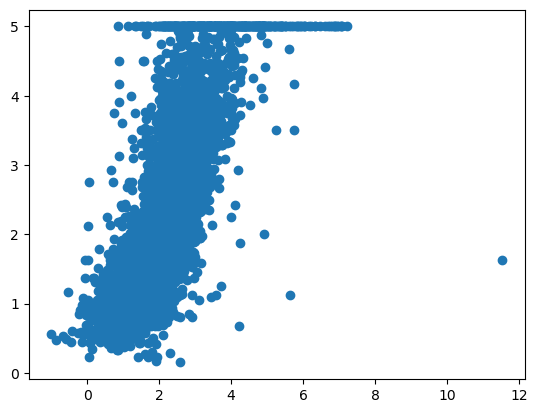

In [29]:
fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)

plt.show()